# Predicting House Sale Prices - Linear Regression and Feature Selection
In this project we will work with housing data for the city of Ames, Iowa from 2006 to 2010. Our mission is to create a linear regression model to predict house sale prices.
To ensure maximum accuracy, we will proceed as follows:
- **Data Exploration**: We will develop an understanding of each feature, and get an idea of their relationship with our prediction target.
- **Data Cleaning/Feature Transformation**: Missing values will be treated. If the columns have more than a 25% missing values, the columns will be dropped. For columns with less missing values, the mode value will be imputed. Relevant categorical features will be transformed as required to be used in our model.
- **Feature Selection**: We will study data correlation to determine the most valuable features and multicollinearity to avoid any imprecise predictions.
- **Model Training and Testing**: We will train and test our model.

## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

### import scikit-learn classes KFold
%matplotlib inline
pd.set_option('display.max_rows', 90)
pd.set_option('display.max_columns', 90)
pd.set_option('display.width', 1000)


data = pd.read_csv('AmesHousing.tsv',delimiter='\t')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

In [2]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Missing values:

In [3]:
(data.isnull().sum()*100/data.shape[0]).sort_values(ascending=False)

Pool QC            99.556314
Misc Feature       96.382253
Alley              93.242321
Fence              80.477816
Fireplace Qu       48.532423
Lot Frontage       16.723549
Garage Qual         5.426621
Garage Yr Blt       5.426621
Garage Cond         5.426621
Garage Finish       5.426621
Garage Type         5.358362
Bsmt Exposure       2.832765
BsmtFin Type 2      2.764505
BsmtFin Type 1      2.730375
Bsmt Cond           2.730375
Bsmt Qual           2.730375
Mas Vnr Type        0.784983
Mas Vnr Area        0.784983
Bsmt Full Bath      0.068259
Bsmt Half Bath      0.068259
Garage Area         0.034130
Garage Cars         0.034130
Total Bsmt SF       0.034130
Bsmt Unf SF         0.034130
BsmtFin SF 2        0.034130
BsmtFin SF 1        0.034130
Electrical          0.034130
Exterior 2nd        0.000000
Exterior 1st        0.000000
Roof Matl           0.000000
Roof Style          0.000000
Year Remod/Add      0.000000
Year Built          0.000000
SalePrice           0.000000
Overall Cond  

Being `SalePrice` our target column, we want to examine all the columns that contain information about the sale. Using these columns may jeopardize our model, since they are not providing any details about the product itself, but they leak information on the sale.

In [4]:
data[data.columns[data.columns.str.contains('Sale') | data.columns.str.contains('Sold')]]

,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,5,2010,WD,Normal,215000
1,6,2010,WD,Normal,105000
2,6,2010,WD,Normal,172000
3,4,2010,WD,Normal,244000
4,3,2010,WD,Normal,189900
...,...,...,...,...,...
2925,3,2006,WD,Normal,142500
2926,6,2006,WD,Normal,131000
2927,7,2006,WD,Normal,132000
2928,4,2006,WD,Normal,170000


## Univariate LR Model - Without Optimizations
In order to prove the importance of feature transformation and selection, we will first determine the RMSE of a univariate model using the feature `Gr Liv Area`.


We will pipeline the operations using three functions:
- `transform_features`
- `select_features`
- `train_and_test`

In [5]:
def transform_features(df): #empty for now        
    return df

In [6]:
def select_features(df): #for now: only using one variable
    return df[['Gr Liv Area']]

In [7]:
def train_and_test(df): #for now: 2 folds, splitting df in half
    df_trans_features = transform_features(df)
    train = df_trans_features[:1460]
    test = df_trans_features[1460:]
    train_features = select_features(train)
    test_features = select_features(test)
    #fit model using select_features()
    lr = LinearRegression()
    lr.fit(train_features,train['SalePrice'])
    #predict
    predictions = lr.predict(test_features)
    #return rmse
    rmse = mean_squared_error(predictions,test['SalePrice'])**(1/2)
    return rmse

In [8]:
print('RMSE =','{:.2f}'.format(train_and_test(data)))

RMSE = 57088.25


## Multivariate LR Model - Optimized

### Feature Transformation

In [9]:
def transform_features(df):
    #delete columns with >25% missing values
    missing_values_pct = df.isnull().sum()*100/df.shape[0]
    drop_cols = missing_values_pct[missing_values_pct > 25].index 
    df_transformed = df.copy()
    for col in drop_cols:
        del df_transformed[col]
    #fill NA values with mode values
    for col in df_transformed.columns:
        df_transformed[col] = df_transformed[col].fillna(df_transformed[col].mode()[0])
    #create 2 new columns that relate timeline of construction,remod and sale, they capture the info better
    df_transformed['years_sold_built'] = df_transformed['Yr Sold'] - df_transformed['Year Built']
    df_transformed['years_sold_remod'] = df_transformed['Yr Sold'] - df_transformed['Year Remod/Add']
    #delete rows with negative values from the two columns created above
    del_index = df_transformed[
        (df_transformed['years_sold_built'] < 0) |
        (df_transformed['years_sold_remod'] < 0)
    ].index
    df_transformed.drop(del_index,inplace=True)
    #delete columns related to the salethey leak sale info - EXCEPT SalePrice (target column)
    #case sensitive to not delete our new columns
    drop_cols = df_transformed.columns[
        (
            df_transformed.columns.str.contains('Sale') 
            | df_transformed.columns.str.contains('Sold')
        ) & ~ df_transformed.columns.str.contains('SalePrice')

    ].tolist() + ['Year Built','Year Remod/Add']
    
    for col in drop_cols:
        del df_transformed[col]
    #delete columns not useful for our model
    df_transformed = df_transformed.drop(["PID", "Order"], axis=1)
    
    return df_transformed

In [10]:
###double check: Missing values are treated
transformed_data = transform_features(data)
missing_vals_pct = transformed_data.isnull().sum()*100/transformed_data.shape[0]
missing_vals_pct.sort_values(ascending=False).head(10)

years_sold_remod    0.0
Foundation          0.0
Exterior 1st        0.0
Exterior 2nd        0.0
Mas Vnr Type        0.0
Mas Vnr Area        0.0
Exter Qual          0.0
Exter Cond          0.0
Bsmt Qual           0.0
Roof Style          0.0
dtype: float64

In [11]:
###double_check: years_sold_built and years_sold_remod have no negative values
transformed_data[['years_sold_built','years_sold_remod']].min()

years_sold_built    0
years_sold_remod    0
dtype: int64

### Feature Selection

#### Numerical Variables
To select the numerical variables, we will determine their correlation. 

In [12]:
correlations = abs(transformed_data.corr())
top_15_corr = correlations['SalePrice'].sort_values(ascending=False)[0:15]
top_15_corr

SalePrice           1.000000
Overall Qual        0.801206
Gr Liv Area         0.717596
Garage Cars         0.648361
Total Bsmt SF       0.644012
Garage Area         0.641425
1st Flr SF          0.635185
years_sold_built    0.558979
Full Bath           0.546118
years_sold_remod    0.534985
Mas Vnr Area        0.506983
TotRms AbvGrd       0.498574
Fireplaces          0.474831
Garage Yr Blt       0.442216
BsmtFin SF 1        0.439284
Name: SalePrice, dtype: float64

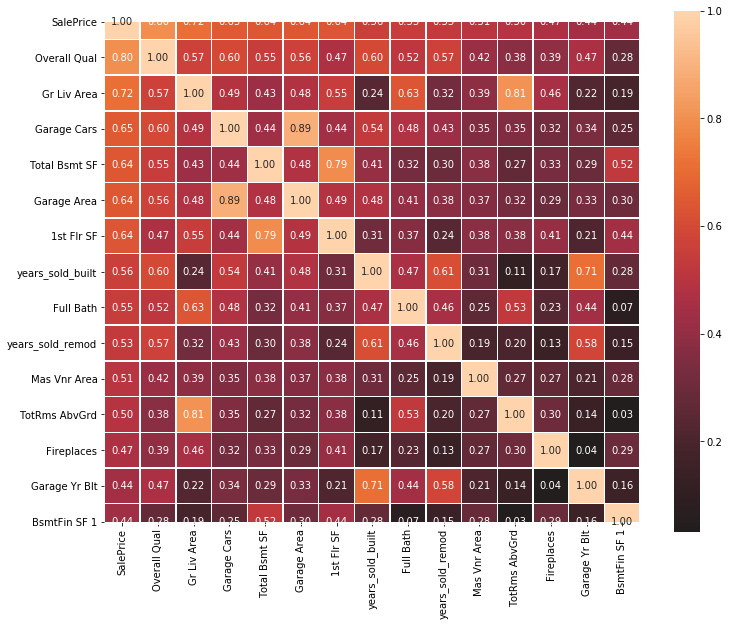

In [13]:
fig, ax = plt.subplots(figsize=(12,12))
top_15_corr_df = abs(transformed_data[top_15_corr.index].corr())
sns.heatmap(
    top_15_corr_df, vmax=1.0, center=0, fmt='.2f',square=True, 
    linewidths=.5, annot=True, cbar_kws={"shrink": .80}
);

In [14]:
corr_unstacked = top_15_corr_df.unstack()
corr_sorted = corr_unstacked.sort_values(kind="quicksort")
collinearity = corr_sorted[(corr_sorted>0.75) & (corr_sorted<1)]
collinearity.drop_duplicates()

Total Bsmt SF  1st Flr SF      0.792227
SalePrice      Overall Qual    0.801206
TotRms AbvGrd  Gr Liv Area     0.806092
Garage Area    Garage Cars     0.888866
dtype: float64

These are the 14 features that are most correlated with SalePrice. 

Risk of multicollinearity -see table above, high correlations between features:
- Gr Liv Area and TotRms AbvGrd: TotRms AbvGrd will not be used.
- Garage Cars and Garage Area: Garage Cars will not be used, since Garage Area gives us more detail -continuous feature vs discrete feature.
- Total Bsmt SF and 1st Flr SF: Both features have a similar correlation to SalePrice. 1st Flr SF will be used.

In [15]:
#Determine the number of unique values per column
transformed_data_object = transformed_data.select_dtypes(include='object')
unique_counts_dict = dict()
for col in transformed_data_object.columns:
    unique_counts_dict[col] = len(transformed_data_object[col].unique())

unique_counts = pd.Series(unique_counts_dict,index=unique_counts_dict.keys())
unique_counts.sort_values(ascending=False)

Neighborhood      28
Exterior 2nd      17
Exterior 1st      16
Condition 1        9
Condition 2        8
House Style        8
Roof Matl          8
Functional         8
MS Zoning          7
BsmtFin Type 2     6
BsmtFin Type 1     6
Roof Style         6
Foundation         6
Garage Type        6
Heating            6
Heating QC         5
Electrical         5
Garage Qual        5
Bldg Type          5
Kitchen Qual       5
Garage Cond        5
Mas Vnr Type       5
Exter Cond         5
Bsmt Qual          5
Lot Config         5
Bsmt Cond          5
Lot Shape          4
Land Contour       4
Exter Qual         4
Bsmt Exposure      4
Land Slope         3
Utilities          3
Garage Finish      3
Paved Drive        3
Central Air        2
Street             2
dtype: int64

In [16]:
### FIX UNIQUE COUNTS DICT!! START FROM SCRATCH

def select_features(df):
    #numerical features selection -see above
    numerical_features = ['SalePrice','Overall Qual', 'Gr Liv Area', 'Garage Cars',
 'Total Bsmt SF', 'Garage Area', '1st Flr SF', 'years_sold_built',
 'Full Bath', 'years_sold_remod', 'Mas Vnr Area', 'TotRms AbvGrd',
 'Fireplaces', 'Garage Yr Blt', 'BsmtFin SF 1']
    #nominal feature selection, filtered to < 10 unique values
    df_object = df.select_dtypes(include='object').copy()
    unique_counts_dict = dict()
    for col in df_object.columns:
        unique_counts_dict[col] = len(df_object[col].unique())
    nominal_features = [key for key,value in unique_counts_dict.items() if value < 10]
    #convert nominal columns to category objects
    for n_feature in nominal_features:
        df_object[n_feature] = df_object[n_feature].astype('category')
    #concatenate dataframe with numeric features and dummies, drop nominal features
    df_new_features = pd.concat([df[numerical_features],
                                pd.get_dummies(df_object[nominal_features])
                               ],
                              axis=1)
    return df_new_features

In [17]:
#double check that our select_features function returns a DataFrame with the numerical and nominal features selected
select_features(transformed_data)

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,years_sold_built,Full Bath,years_sold_remod,Mas Vnr Area,TotRms AbvGrd,Fireplaces,Garage Yr Blt,BsmtFin SF 1,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,...,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,215000,6,1656,2.0,1080.0,528.0,1656,50,1,50,112.0,7,2,1960.0,639.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,105000,5,896,1.0,882.0,730.0,896,49,1,49,0.0,5,0,1961.0,468.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,172000,6,1329,1.0,1329.0,312.0,1329,52,1,52,108.0,6,0,1958.0,923.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,244000,7,2110,2.0,2110.0,522.0,2110,42,2,42,0.0,8,2,1968.0,1065.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,189900,5,1629,2.0,928.0,482.0,928,13,2,12,0.0,6,1,1997.0,791.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,6,1003,2.0,1003.0,588.0,1003,22,1,22,0.0,6,0,1984.0,819.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2926,131000,5,902,2.0,864.0,484.0,902,23,1,23,0.0,5,0,1983.0,301.0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2927,132000,5,970,0.0,912.0,0.0,970,14,1,14,0.0,6,0,2005.0,337.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2928,170000,5,1389,2.0,1389.0,418.0,1389,32,1,31,0.0,6,1,1975.0,1071.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1


### Training and Testing our Optimized LR Model
- Notes: Add KFold

In [18]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    features = df.columns.drop('SalePrice') #drop target column to index the rest of the features
    #fit model
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    #predict
    predictions = lr.predict(test[features])
    #return rmse
    rmse = mean_squared_error(predictions,test['SalePrice'])**(1/2)
    return rmse

In [19]:
transformed_features = transform_features(data)
selected_features = select_features(transformed_features)
rmse = train_and_test(selected_features)

print('RMSE =','{:.2f}'.format(rmse))

RMSE = 32504.62
